In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

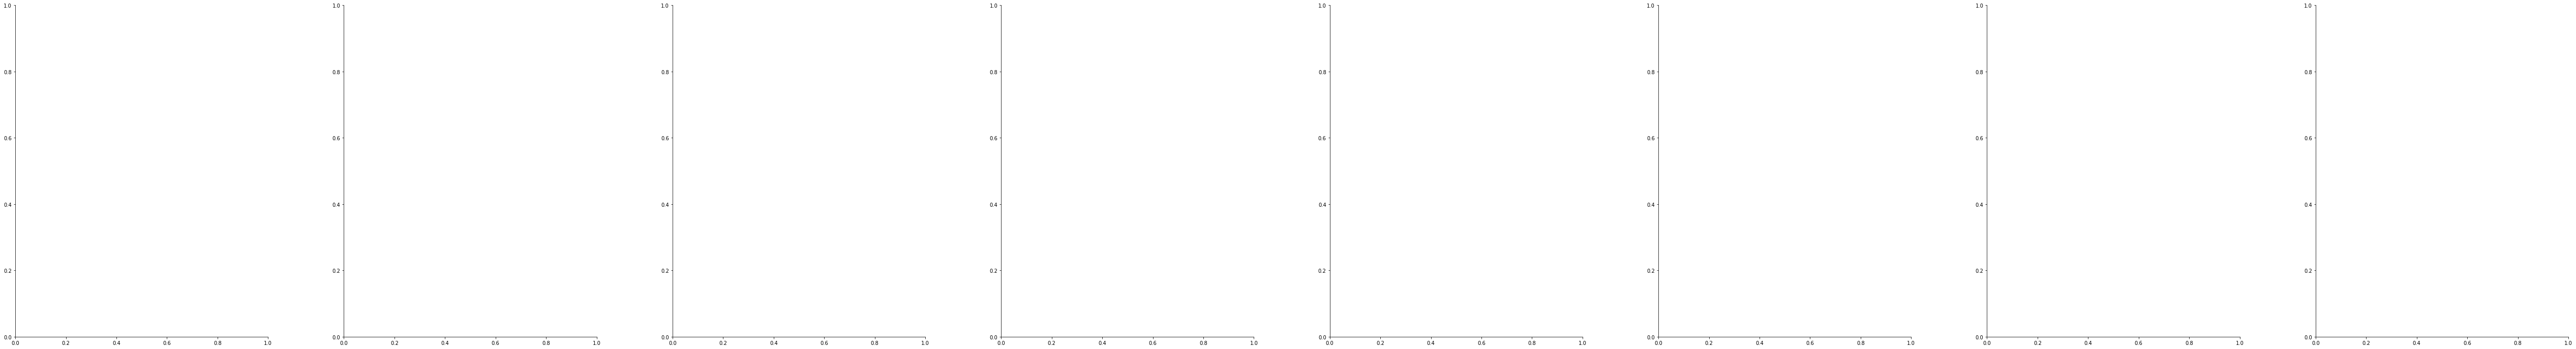

In [2]:
fig, axs = plt.subplots(1, 8, figsize=(90, 12), gridspec_kw={'hspace': 0.2, 'wspace': 0.3})
palette = sns.color_palette('Greys', n_colors=2)
plt.rcParams.update({'font.size': 30})
sns.despine(top=True, right=True)

def avg(lst):
    return sum(lst)/len(lst)
    
def create_legend():
    for ax in axs.flat:
        ax.legend([],[], frameon=False)
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels)

def myplot(kind, axs, title):
    if kind == "lat":
        plot_latency(axs, title)
    if kind == "cpu":
        plot_cpu(axs, title)
    if kind == "goodput":
        plot_goodput(axs, title)
    if kind == "cpg":
        plot_cpu_per_goodput(axs, title)

def plot_latency(axs, title):
    results = []
    for e in pq_100:
      results.append([e, "parquet", "100"])
    for e in rpq_100:
      results.append([e, 'rados-parquet', "100"])
    df = pd.DataFrame(np.array(results), columns=['Duration (s)', 'File Format', 'Selectivity (%)'])
    df[['Duration (s)']] = df[['Duration (s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Duration (s)", hue="File Format", data=df, ci='sd', capsize=.15, errwidth=0.5, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 500))
    sns_plot.tick_params(axis="y", labelsize=30)
    sns_plot.tick_params(axis="x", labelsize=30)
    sns_plot.set_title(title, fontdict= { 'fontsize': 35})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=35)
    sns_plot.set_ylabel('Duration (s)', fontsize=35)
    fig.savefig('latency_hep_column.png', dpi=200)


def plot_cpu(axs, title):
    results = []
    for e in cpu_pq_100:
      results.append([e, "parquet", "100"])
    for e in cpu_pq_10:
      results.append([e, "parquet", "10"])
    for e in cpu_pq_1:
      results.append([e, "parquet", "1"])
    for e in cpu_rpq_100:
      results.append([e, 'rados-parquet', "100"])
    for e in cpu_rpq_10:
      results.append([e, 'rados-parquet', "10"])
    for e in cpu_rpq_1:
      results.append([e, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU Usage (%)', 'File Format', 'Selectivity (%)'])
    df[['CPU Usage (%)']] = df[['CPU Usage (%)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="CPU Usage (%)", hue="File Format", data=df, ax=axs, ci='sd', capsize=.15, errwidth=0.5, palette=palette)
    sns_plot.set(ylim=(0, 350000))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('CPU Usage', fontsize=10)
    fig.savefig('cpu.png', dpi=600)


def plot_goodput(axs, title):
    results = []
    for e in pq_100:
      results.append([(154.8/e)*1000, "parquet", "100"])
    for e in pq_10:
      results.append([(15.48/e)*1000, "parquet", "10"])
    for e in pq_1:
      results.append([(1.548/e)*1000, "parquet", "1"])
    for e in rpq_100:
      results.append([(154.8/e)*1000, 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([(15.48/e)*1000, 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([(1.548/e)*1000, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Goodput (MB/s)', 'File Format', 'Selectivity (%)'])
    df[['Goodput (MB/s)']] = df[['Goodput (MB/s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Goodput (MB/s)", hue="File Format", ci='sd', capsize=.15, errwidth=0.5, data=df, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 1000))
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('Goodput (MB/s)', fontsize=10)
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    fig.savefig('goodput.png', dpi=600)


def plot_cpu_per_goodput(axs, title):
    results = []
    for e in pq_100:
      results.append([ avg(cpu_pq_100)/((154.8/e)*1000) , "parquet", "100"])
    for e in pq_10:
      results.append([ avg(cpu_pq_10)/((15.48/e)*1000) , "parquet", "10"])
    for e in pq_1:
      results.append([ avg(cpu_pq_1)/((1.548/e)*1000) , "parquet", "1"])
    for e in rpq_100:
      results.append([ avg(cpu_rpq_100)/((154.8/e)*1000) , 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([ avg(cpu_rpq_10)/((15.48/e)*1000) , 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([ avg(cpu_rpq_1)/((1.548/e)*1000) , 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU/Goodput', 'File Format', 'Selectivity (%)'])
    df[['CPU/Goodput']] = df[['CPU/Goodput']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="CPU/Goodput", hue="File Format", data=df, ci='sd', capsize=.15, errwidth=0.5, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 40000))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('CPU/Goodput', fontsize=10)
    fig.savefig('cpu_per_goodput.png', dpi=600)

In [3]:
kind = "lat"

# hep, 8 nodes, 16 threads, 1 col
pq_100 =  [25.495221614837646, 25.197285413742065]
rpq_100 =  [28.185990571975708, 28.09575867652893]
myplot(kind, axs[0], "1 Col")

# hep, 8 nodes, 16 threads, 10 col
pq_100 =  [30.198258638381958, 30.391347408294678]
rpq_100 = [30.91686511039734, 31.836838006973267]
myplot(kind, axs[1], "10 Col")

# hep, 8 nodes, 16 threads, 20 col
pq_100 =  [36.5145378112793, 36.46935987472534]
rpq_100 =  [32.816765546798706, 32.43723130226135]
myplot(kind, axs[2], "20 Col")

# hep, 8 nodes, 16 threads, 50 col
pq_100 =  [63.97969198226929, 62.46666502952576]
rpq_100 =  [44.361276149749756, 44.53066158294678]
myplot(kind, axs[3], "50 Col")

# hep, 8 nodes, 16 threads, 100 col
pq_100 =  [78.08266043663025, 77.58940696716309]
rpq_100 =  [44.11970138549805, 44.6355996131897]
myplot(kind, axs[4], "100 Col")


# hep, 8 nodes, 16 threads, 150 col
pq_100 =  [186.72632384300232, 182.40789580345154]
rpq_100 = [69.30094528198242, 69.01265025138855]
myplot(kind, axs[5], "150 Col")


# hep, 8 nodes, 16 threads, 500 col
pq_100 = [355.64834213256836, 355.8885250091553]
rpq_100 = [115.26016283035278, 126.24265766143799]
myplot(kind, axs[6], "500 Col")

# hep, 8 nodes, 16 threads, 1500 cols
pq_100 =  [473.411269903183, 477.9749960899353]
rpq_100 =  [153.00294756889343, 150.69650316238403]
myplot(kind, axs[7], "1500 Col")